In [1]:
import os
import numpy as np

import fitsio

from astropy.io import fits
from astropy.table import Table, vstack, join
from astropy.convolution import convolve, Gaussian1DKernel

import matplotlib
import matplotlib.pyplot as plt

import sys
import glob
import  scipy.optimize    as op
import urllib.request
from astropy.table import Table

In [2]:
DESI = Table.read('/home/hquintero/DESI/catQSO_dark_bal_mask_sv13_wLN.fits')
b = (DESI['TARGETID']==39633282643528010) & (DESI['SURVEY']=='sv1')

spec = DESI[b]
spec['HPXPIXEL']

10743


In [3]:
from astropy.io import fits
from astropy.convolution import convolve, Gaussian1DKernel
local_dir="/home/hquintero/DESI//"
file="coadd-sv1-dark-10743.fits"
archivo_local = os.path.join(local_dir,file)
hdul = fits.open(archivo_local)
spectrum = Table.read(hdul)

In [4]:
target = np.array(spectrum['TARGETID'])
compar = np.where(target == 39633282643528010)
hdul.info()

Filename: /home/hquintero/DESI//coadd-sv1-dark-10743.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   25R x 70C   ['K', 'J', 'D', 'D', 'E', 'E', 'E', 'K', 'B', '3A', 'D', 'J', 'I', '8A', 'J', 'J', '4A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'E', 'E', 'E', 'E', 'K', '2A', 'E', 'E', 'E', 'E', '1A', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'D', 'D', 'I', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'D', 'E', 'D', 'E', 'E']   
  2  EXP_FIBERMAP    1 BinTableHDU     64   10642R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 25)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 25)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 25)   int32 (rescales to uint

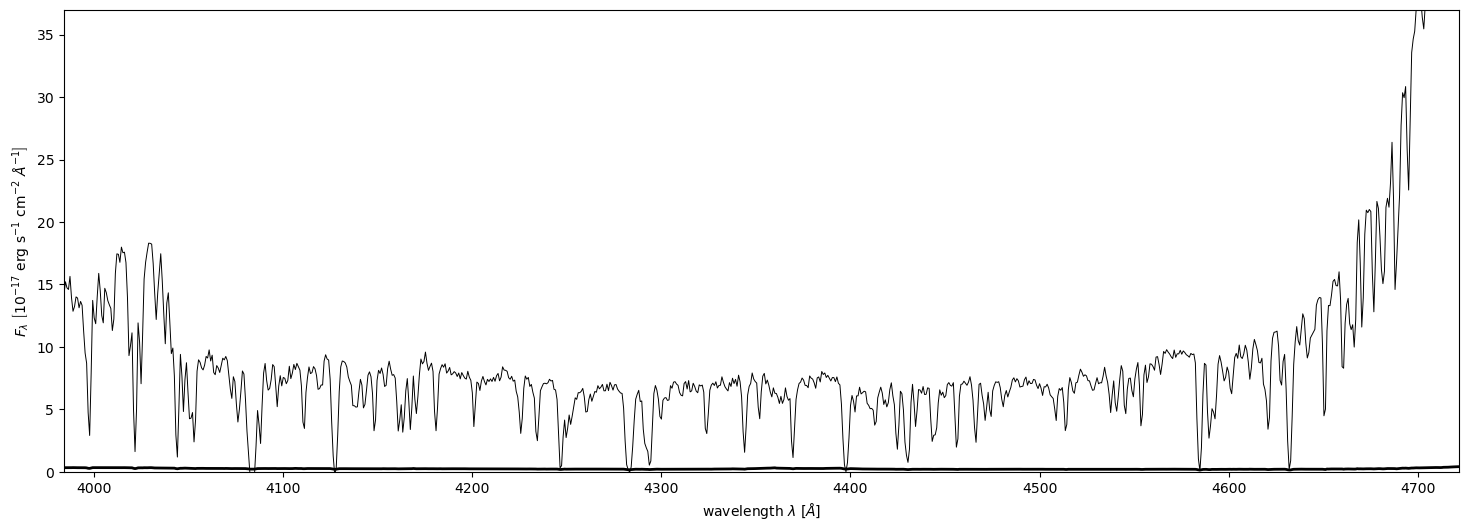

In [5]:
b_wave = hdul[3].data
b_flux = hdul[4].data[21]
b_ivar = hdul[5].data[21]
r_wave = hdul[8].data
r_flux = hdul[9].data[21]
r_ivar = hdul[10].data[21]
z_wave = hdul[13].data
z_flux = hdul[14].data[21]
z_ivar = hdul[15].data[21]

plt.figure(figsize=(18,6),dpi=100)

#plt.plot(b_wave,b_flux)
#plt.plot(r_wave,r_flux)
#plt.plot(z_wave,z_flux)

plt.xlim(3984.0476, 4721.842)
plt.ylim(0, 37)
plt.xlabel(r"wavelength $\lambda\ \left[ \AA \right]$")
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$")

plt.plot(b_wave,convolve(b_flux, Gaussian1DKernel(0.01)), color ='k',lw=0.7)
plt.plot(r_wave,convolve(r_flux, Gaussian1DKernel(0.01)), color ='k',lw=0.7)
plt.plot(z_wave,convolve(z_flux, Gaussian1DKernel(0.01)), color ='k',lw=0.7)
plt.plot(b_wave,convolve(1/np.sqrt(b_ivar), Gaussian1DKernel(0.01)), color ='k',lw=2)
plt.plot(r_wave,convolve(1/np.sqrt(r_ivar), Gaussian1DKernel(0.01)), color ='k',lw=2)
plt.plot(z_wave,convolve(1/np.sqrt(z_ivar), Gaussian1DKernel(0.01)), color ='k',lw=2)

## Spec stacked and continuum visaulization

In [6]:
from astropy.io import fits
from astropy.convolution import convolve, Gaussian1DKernel
local_dir="/home/hquintero/DESI//"
file="DESIedr_FINALcat.fits"
archivo_local = os.path.join(local_dir,file)
hdul = fits.open(archivo_local)
selected = Table.read(hdul)
a = selected['TARGETID'] == 39633282643528010
D = selected[a]


z = D['Z'][0]

z

2.8790473450287415

In [7]:

# Define the Lyman-alpha and Lyman-beta rest wavelengths in Angtroms.
lines = {
  "Lyb": 1025.72,
  "Lya": 1215.67,
  "CIV": 1549.06,
  "CIII": 1908.734,
  "MgII": 2798.75,
  "OIII": 5006.843,
  "Ha": 6562.819,
  "OVI": 1035,
  "NV": 1240.14,
  "CII": 2326.44,
  "HeII": 1640.42,
  "SiIV": 1396.76,
  "Ly-L": 912,
  "OI":1302.168
}
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}

In [8]:
bw = np.array(b_wave)
rw = np.array(r_wave)
zw = np.array(z_wave)

bf = np.array(convolve(b_flux, Gaussian1DKernel(0.01)))
rf = np.array(convolve(r_flux, Gaussian1DKernel(0.01)))
zf = np.array(convolve(z_flux, Gaussian1DKernel(0.01)))

bn = np.array(convolve(1/np.sqrt(b_ivar), Gaussian1DKernel(0.01)))
rn = np.array(convolve(1/np.sqrt(r_ivar), Gaussian1DKernel(0.01)))
zn = np.array(convolve(1/np.sqrt(z_ivar), Gaussian1DKernel(0.01)))

WAVE = np.concatenate((bw,rw,zw))
FLUX = np.concatenate((bf,rf,zf))
NOISE = np.concatenate((bn,rn,zn))

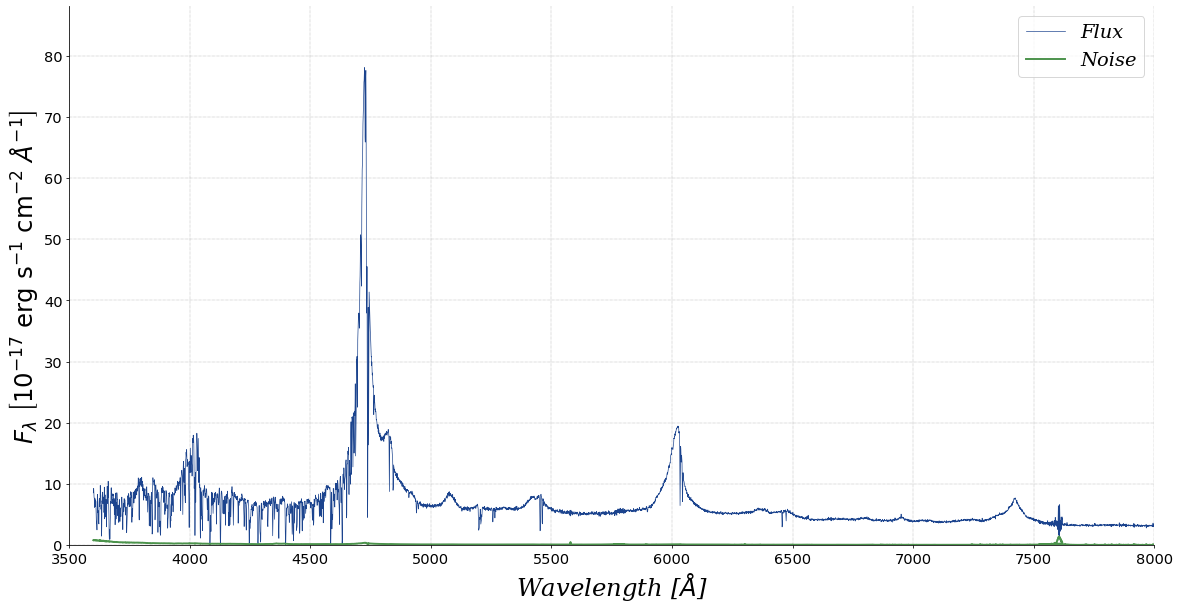

In [9]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(20,10),dpi=70)
plt.plot(WAVE,FLUX,label = 'Flux'\
         ,lw=0.7, color ='#1C448E')
plt.plot(WAVE,NOISE,lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3500,8000)
plt.ylim(0,max(FLUX)+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)



plt.legend(prop = txt_prop, loc= 'upper right')
plt.show()



In [10]:
REJ = Table.read('rejection_log.fits.gz')

b = REJ['TARGETID'] == 39633282643528010

X = REJ[b]

X

FOREST_SIZE,REJECTION_STATUS,LOS_ID,RA,DEC,Z,MEANSNR,BLINDING,WAVE_SOLUTION,DELTA_LAMBDA,MEANZ,MEANRESO,MEANRESO_PIX,TARGETID,NIGHT,PETAL,TILE
int64,bytes33,int64,float64,float64,float64,float64,bytes7,bytes3,float64,float64,float64,float64,int64,bytes1,bytes1,bytes1
620,accepted,39633282643528010,3.7134889675766813,0.9127851307664956,2.8790473450287415,28.72571717113745,desi_m2,lin,0.8000000000010914,2.558860546037157,46.11691845472131,0.830951614178378,39633282643528010,--,--,--


In [11]:
DeL = fits.open('delta_attributes_iteration6.fits.gz')
DeL.info()

Filename: delta_attributes_iteration6.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  STACK_DELTAS    1 BinTableHDU     16   5001R x 3C   [D, D, D]   
  2  VAR_FUNC      1 BinTableHDU     21   20R x 6C   [D, D, D, D, D, D]   
  3  CONT          1 BinTableHDU     15   49R x 3C   [D, D, D]   
  4  FIT_METADATA    1 BinTableHDU     21   12115R x 6C   [K, D, D, D, K, 3A]   


In [12]:
DeL = fits.open('delta_attributes_iteration6.fits.gz')[3]
FIT = Table.read(DeL)
FIT

loglam_rest,mean_cont,weight
float64,float64,float64
3.0217404342732217,1.067442546120961,104679.0
3.022840610876528,1.0501657921127385,105983.0
3.023938007498089,1.0284963061717411,107155.0
3.0250326381516985,1.0454803837859639,108363.0
3.0261245167454502,1.0513124155641398,109579.0
3.0272136570828017,1.06199820551822,110601.0
3.0283000728636185,1.0482463407713494,112090.0
3.0293837776852097,1.0619253203755628,113237.0
3.0304647850433484,1.067430327534063,114428.0


## Search for the specific delta

In [13]:
delta_folder = '/home/hquintero/DESI/Delta/'

lista = os.listdir(delta_folder)

ID = str(39633282643528010)

file = 'File: '

for a in range(len(lista)):
    
    S = fits.open(delta_folder+lista[a])
    
    for b in range(len(S)):
        
        HDUs = str(S[b].name)
        
        if (HDUs == ID):
            file = file + str(delta_folder+lista[a])
            #break
print(file)

File: /home/hquintero/DESI/Delta/delta-33.fits.gz


In [14]:
DELTA = fits.open('/home/hquintero/DESI/Delta/delta-33.fits.gz')
                  
for x in range(len(DELTA)):
    
    HDUs = str(DELTA[x].name)
        
    if (HDUs == ID):
        print(x)
                  

60


In [15]:
DELTA = fits.open('/home/hquintero/DESI/Delta/delta-33.fits.gz')[60]
delta = Table.read(DELTA)
delta

LAMBDA,DELTA_BLIND,WEIGHT,CONT,IVAR,DIFF,RESO,RESO_PIX,RESOMAT
Angstrom,,,Flux units,Flux units,Flux units,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64[11]
4073.6000000006475,0.17071849760171753,1.0,6.501053525820335,638.0866546424967,0.0,49.170284296128095,0.8352434001970049,-0.0012572400724946123 .. -0.0012511682243266987
4074.400000000648,0.11276093548961752,1.0,6.4939831377701305,639.9868299105101,0.0,49.06825918450841,0.833673999072429,-0.0013074899800169888 .. -0.0011981215956010163
4075.200000000647,-0.15963855912727798,1.0,6.486911574629818,636.2019308999111,0.0,49.069277488483515,0.8338549776399349,-0.0013291026931434291 .. -0.001204313774606242
4076.0000000006476,-0.39330296509952234,1.0,6.479838837363764,659.1345399292279,0.0,48.94348109508253,0.8318805242277449,-0.0012381293260076295 .. -0.0012929045353067743
4076.8000000006487,-0.23490998178227163,1.0,6.4727649269356204,651.5373328043088,0.0,48.97722925650683,0.8326175040208065,-0.0012202660656856676 .. -0.00121999056146211
4077.600000000651,-0.016571539364647614,1.0,6.465689844308248,670.29293393207,0.0,49.10792203459708,0.8350030999402202,-0.0012464912769223544 .. -0.0010889581585512426
4078.400000000651,0.22660424955698866,1.0,6.458613590443789,693.4988841001652,0.0,49.11687699836876,0.8353192013040518,-0.0012179447491404082 .. -0.001047268801044303
4079.2000000006547,0.20877673094761628,1.0,6.451536166303527,678.5116320340162,0.0,49.22553079989018,0.8373312497051134,-0.0012267705399742763 .. -0.0010675068880530067


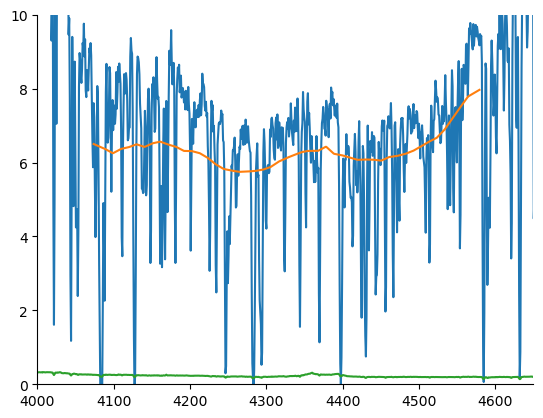

In [16]:
plt.plot(WAVE,FLUX)
plt.plot(delta['LAMBDA'][:],delta['CONT'][:])
plt.plot(WAVE,NOISE)
plt.xlim(4000,4650)
plt.ylim(0,10)

plt.show()

In [17]:
A = 0.0023
B = 3.64
C = -0.05
D = 4.36
E = 0.21

def tau(z):
    t = A*((1+z)**B)+C*np.exp((-(1+z-D)**2)/(2*(E**2)))
    return -1*t

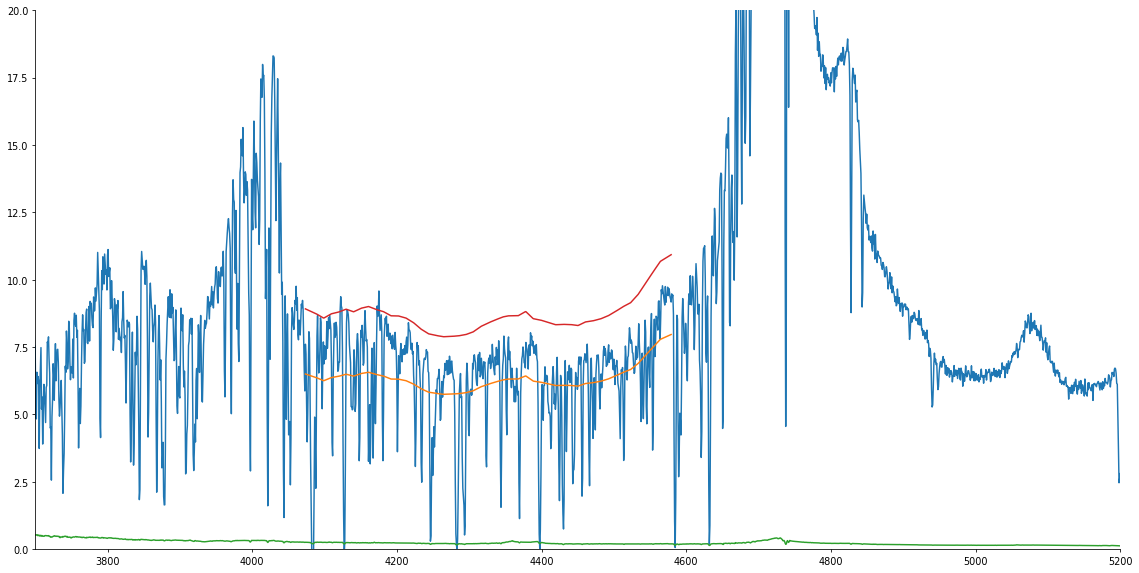

In [18]:
plt.figure(figsize=(20,10),dpi=70)

mean_flux = np.exp(tau(z))

cont_estim = delta['CONT'][:]/mean_flux

plt.plot(WAVE,FLUX)
plt.plot(delta['LAMBDA'][:],delta['CONT'][:])
plt.plot(WAVE,NOISE)
plt.plot(delta['LAMBDA'][:],cont_estim)
plt.xlim(3700,5200)
plt.ylim(0,20)
plt.show()

### Spectra comparison between eBOSS and DESI

In [19]:
eboss_spec = Table.read('/home/hquintero/eboss/spec-7339-56799-0379(compar).fits')
eboss_spec

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
6.652485,3.5524,0.16624999,0,524288,1.3435864,4.232137,7.652201
5.322442,3.5525,0.0,0,524288,1.3433064,3.8976345,7.810876
3.992705,3.5526,0.19087836,0,0,1.3430296,3.633657,7.8719244
9.344319,3.5527,0.16609532,0,0,1.3427565,3.4549558,7.8973646
10.036886,3.5528,0.16445304,0,0,1.342481,3.2738664,7.9727545
6.6345987,3.5529,0.1774771,0,0,1.3422017,3.197419,7.8253827
5.3547153,3.553,0.17639707,0,0,1.3419214,3.1441786,7.8706675
6.8375573,3.5531,0.18780385,0,0,1.3416346,3.0853055,8.276597
2.8420794,3.5532,0.20581682,0,0,1.3413633,3.0189853,7.9739156


/tmp/ipykernel_27719/3418344546.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**eboss_spec['loglam'],1/np.sqrt(eboss_spec['ivar']),lw=2, color = '#4C934C')


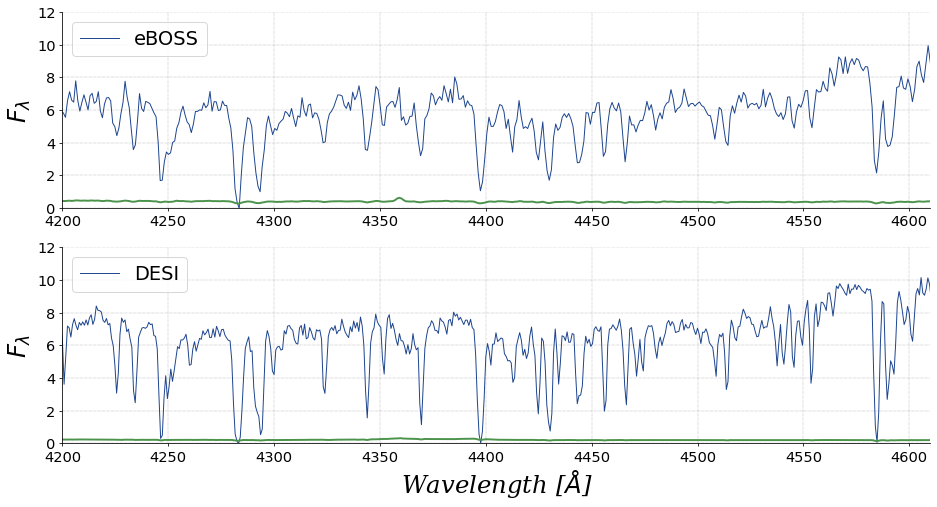

In [29]:
Xmin = 4200  
Xmax = 4610

Ymin = 0
Ymax = 12

plt.figure(figsize=(16,8),dpi=70)

plt.subplot(2, 1, 1)
plt.plot(10**eboss_spec['loglam'],eboss_spec['flux'],label = 'eBOSS'\
         ,lw=1, color ='#1C448E')
plt.plot(10**eboss_spec['loglam'],1/np.sqrt(eboss_spec['ivar']),lw=2, color = '#4C934C')
plt.ylabel(r"$F_{\lambda}$", style = 'oblique', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(Xmin,Xmax)
plt.ylim(Ymin,Ymax)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)
plt.legend(loc = 'upper left', fontsize = 20)


plt.subplot(2, 1, 2)
plt.plot(WAVE,FLUX,label = 'DESI',lw=1, color ='#1C448E')
plt.plot(WAVE,NOISE,lw=2, color = '#4C934C')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(Xmin,Xmax)
plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
plt.ylabel(r"$F_{\lambda}$", style = 'oblique', family = 'serif', size = 25)
plt.ylim(Ymin,Ymax)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)
plt.legend(loc = 'upper left', fontsize = 20)
plt.show()